### Semeion Hand-written Digit classification with Simple CNN (Dr. Sudipta Samanta)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
import random

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", header = None, sep = " ")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN


In [4]:
df.shape

(1593, 267)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# convert dataframe to numpy array
df1 = df.values

In [7]:
print(df1.shape)
print(type(df1))

(1593, 267)
<class 'numpy.ndarray'>


In [8]:
x = df1[:,0:256]
y = df1[:,256:266]
print("X: ", x.shape)
print("Y: ", y.shape)

X:  (1593, 256)
Y:  (1593, 10)


In [9]:
x[0]

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [10]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

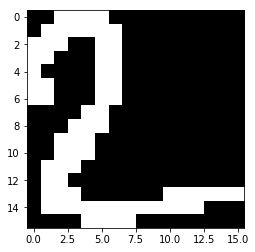

In [11]:
# Convert data to figure and check how it looks
fig = x[50].reshape(16,16) # reshape to 16 x 16 dimension
plt.imshow(fig,cmap="gray")
plt.show()

In [12]:
print(len(x))

1593


### Reshape data to feed into network

In [13]:
X = x.reshape(1593, 16, 16, 1)

In [14]:
# Split Data into training and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1115, 16, 16, 1) (1115, 10)
(478, 16, 16, 1) (478, 10)


### Build a simple CNN

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(16,16,1)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
X_train.shape

(1115, 16, 16, 1)

In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.3)

Train on 780 samples, validate on 335 samples
Epoch 1/20
780/780 [==============================] - 2s 2ms/step - loss: 1.8332 - acc: 0.3462 - val_loss: 1.2642 - val_acc: 0.5224
Epoch 2/20
780/780 [==============================] - 0s 122us/step - loss: 0.9387 - acc: 0.6795 - val_loss: 1.0652 - val_acc: 0.6209
Epoch 3/20
780/780 [==============================] - 0s 120us/step - loss: 0.6586 - acc: 0.7885 - val_loss: 1.5249 - val_acc: 0.5134
Epoch 4/20
780/780 [==============================] - 0s 124us/step - loss: 0.4639 - acc: 0.8372 - val_loss: 1.0111 - val_acc: 0.7134
Epoch 5/20
780/780 [==============================] - 0s 121us/step - loss: 0.3637 - acc: 0.8936 - val_loss: 0.4758 - val_acc: 0.8418
Epoch 6/20
780/780 [==============================] - 0s 121us/step - loss: 0.3105 - acc: 0.8833 - val_loss: 0.3147 - val_acc: 0.9015
Epoch 7/20
780/780 [==============================] - 0s 121us/step - loss: 0.2539 - acc: 0.9077 - val_loss: 0.4492 - val_acc: 0.8806
Epoch 8/20
780/780

### Plotting Training and Validation Loss

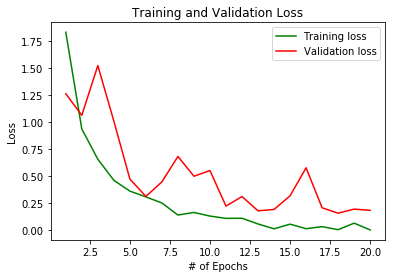

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training loss') 
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting Training and Validation Accuracy

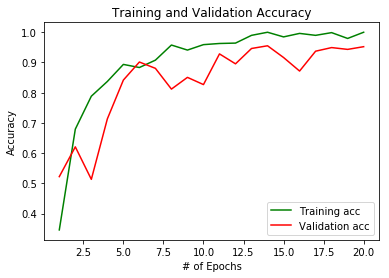

In [21]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'g', label = 'Training acc') 
plt.plot(epochs, val_acc_values, 'r', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

478/478 [==============================] - 0s 260us/step
Test loss: 0.2701152061817536
Test accuracy: 0.9372384942226331


### Adding Dropout layers for overfitting

In [23]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(16,16,1)))
model1.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [25]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.3)

Train on 780 samples, validate on 335 samples
Epoch 1/20
780/780 [==============================] - 0s 574us/step - loss: 1.9913 - acc: 0.2923 - val_loss: 1.8766 - val_acc: 0.3224
Epoch 2/20
780/780 [==============================] - 0s 132us/step - loss: 1.3615 - acc: 0.5346 - val_loss: 0.9407 - val_acc: 0.6925
Epoch 3/20
780/780 [==============================] - 0s 133us/step - loss: 0.8893 - acc: 0.7026 - val_loss: 0.6331 - val_acc: 0.7970
Epoch 4/20
780/780 [==============================] - 0s 129us/step - loss: 0.7018 - acc: 0.7808 - val_loss: 0.4630 - val_acc: 0.8657
Epoch 5/20
780/780 [==============================] - 0s 130us/step - loss: 0.5694 - acc: 0.8192 - val_loss: 0.4845 - val_acc: 0.8448
Epoch 6/20
780/780 [==============================] - 0s 131us/step - loss: 0.4763 - acc: 0.8295 - val_loss: 0.4947 - val_acc: 0.8358
Epoch 7/20
780/780 [==============================] - 0s 130us/step - loss: 0.3823 - acc: 0.8769 - val_loss: 0.2992 - val_acc: 0.9104
Epoch 8/20
780/7

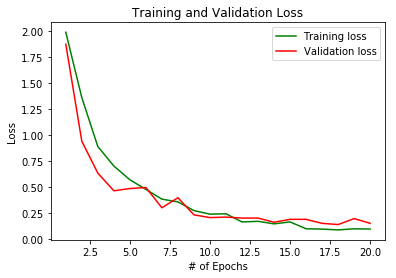

In [27]:
history_dict1 = history1.history
loss_values = history_dict1['loss']
val_loss_values = history_dict1['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label = 'Training loss') 
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

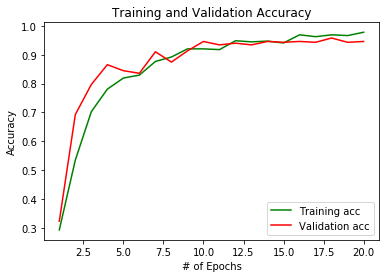

In [28]:
acc_values = history_dict1['acc']
val_acc_values = history_dict1['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'g', label = 'Training acc') 
plt.plot(epochs, val_acc_values, 'r', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Evaluate Model performance for Test Dataset

In [29]:
score1 = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

478/478 [==============================] - 0s 213us/step
Test loss: 0.2633954554671523
Test accuracy: 0.9372384939732412


In [30]:
y_pred = model1.predict(X_test)

In [32]:
y_score = model1.predict(X_test)

### ROC curve and area under the ROC curve

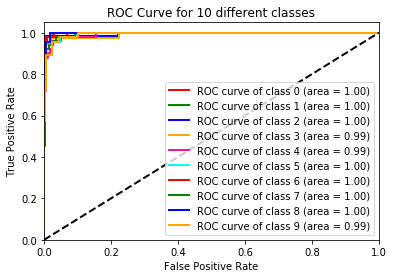

In [35]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(1)
colors = cycle(['red','green','blue', 'orange', 'deeppink','cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 10 different classes')
plt.legend(loc="lower right")
plt.show()

### Real Label vs Predicted Label

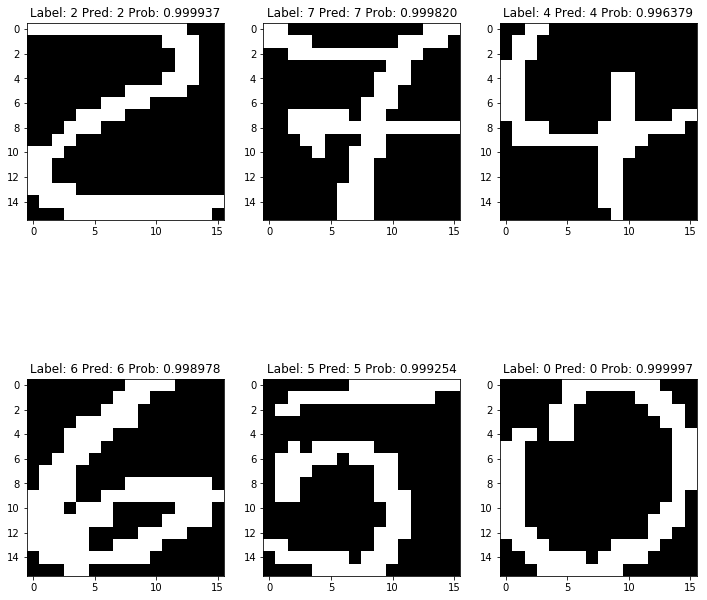

In [36]:
row = 2
col = 3

fig, axes = plt.subplots(row,col,figsize=(12,12))
y_value = np.array([0,1,2,3,4,5,6,7,8,9])
for i in range(0,row):
    for j in range(0,col):
        x = random.randint(0,len(X_test))
        axes[i, j].imshow(X_test[x].reshape(16,16),cmap="gray")
        axes[i, j].set_title('Label: %d Pred: %d Prob: %f'
        %(y_value[np.argmax(y_test[x])],y_value[np.argmax(y_pred[x])],y_pred[x][np.argmax(y_pred[x])]))
        
plt.show()